In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Motion_Graphic_Artist.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Motion-Graphic-Artist.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Motion Graphic Artist Jobs - Upwork.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_4950/155573988.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,Contractor_tier,Skill_one,Skill_two,skill_three,skill_four,skill_five,skil_six,skill_seven
0,Looking for an Animator / Animation Team for A...,"Hey everyone, We're looking to achieve this le...",None,"Motion Graphics', 'Adobe After Effects', 'Vide...",None,Hourly,Intermediate,"More than 6 months, 30+ hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Animations for children,Animations for children. Alphabets and so for....,None,"Motion Graphics', '2D Animation', 'Animation',...",\n $12\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Creating multiple 2D infographic character and...,Creating infographics for the below following1...,None,"Motion Graphics', 'Pop Art', 'Chibi Style', 'C...",None,Hourly,Intermediate,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IMMEDIATE Graphic design Artist and NFT Projects,"Looking for an EXPERIENCED Graphic Designer, t...",None,"Graphic Design', 'Logo Design', 'Adobe Photosh...",None,Hourly: $3.00-$4.00,Expert,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Animator needed to create frames for video,"Make drawings of live models, reference materi...",None,"Motion Graphics', 'Animation', '2D Animation",None,Hourly: $8.00-$20.00,Entry level,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Creative needed for simple animation,I'm looking for someone to make a simple anima...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Creative-needed-for...,Fixed-price,Expert,Graphic Design,Motion Graphics,2D Animation,Animation,Adobe After Effects,Adobe Illustrator,Traditional Animation
476,Cinematic Animation Trailer - NFT Project,"We are a team of 8, currently working on our N...",NaN,NaN,NaN,NaN,NaN,"1 to 3 months, Less than 30 hrs/week",https://www.upwork.com/job/Cinematic-Animation...,Hourly: $10.00-$25.00,Intermediate,Motion Graphics,Adobe After Effects,3D Animation,Adobe Premiere Pro,Maxon Cinema 4D,Video Editing,NaN
477,Animator for Youtube Channel for kids,My name is Noor Kayy\nLooking for a new team m...,NaN,NaN,NaN,NaN,NaN,"More than 6 months, 30+ hrs/week",https://www.upwork.com/job/Animator-for-Youtub...,Hourly,Entry level,Motion Graphics,2D Animation,Animation,Illustration,Video Production,Video Editing,Character Design
478,Illustrate and Build Storyboards for an Animat...,I'm working on a promotional video for a new p...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Illustrate-and-Buil...,Fixed-price,Expert,Graphic Design,Motion Graphics,Illustration,Storyboarding,Corporate Brand Identity,Adobe Illustrator,2D Design


In [3]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

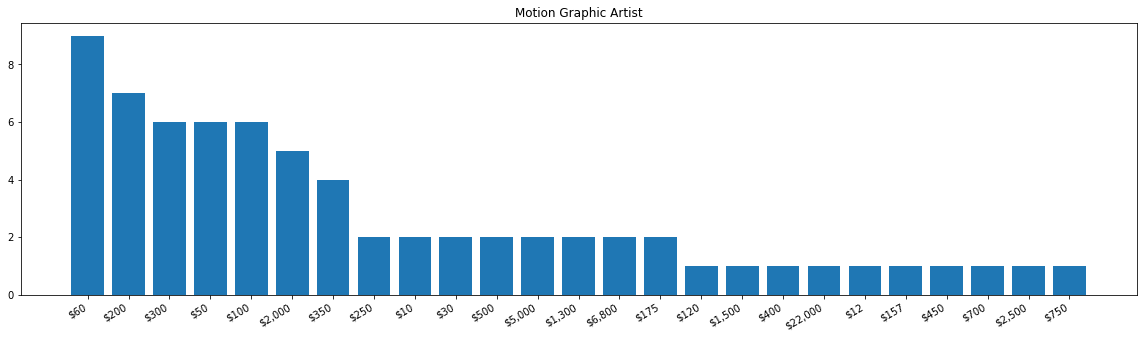

In [4]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.title("Motion Graphic Artist")
plt.xticks(rotation=30, ha="right")
plt.show()



In [5]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [6]:
merge["CT"] = merge["CT"].str.strip()

In [7]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    234
Expert          180
Entry level      66
Name: CT, dtype: int64

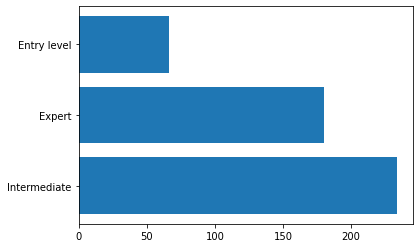

In [8]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [9]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [10]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [12]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [13]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

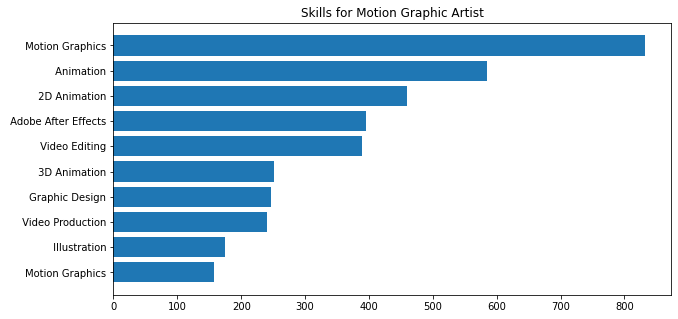

In [14]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
sort = count_skill.sort_values()
plt.figure(figsize=(10,5))
plt.title("Skills for Motion Graphic Artist")
plt.barh(sort.index,sort.values)
plt.show()

In [15]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

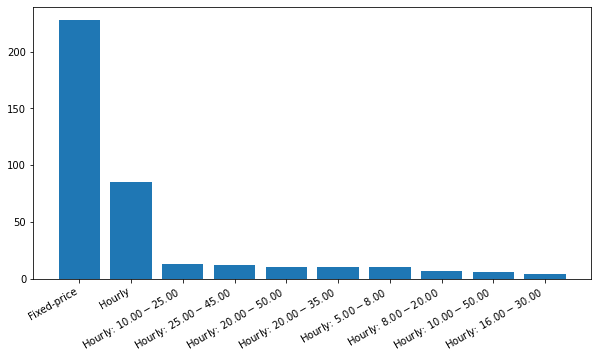

In [16]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


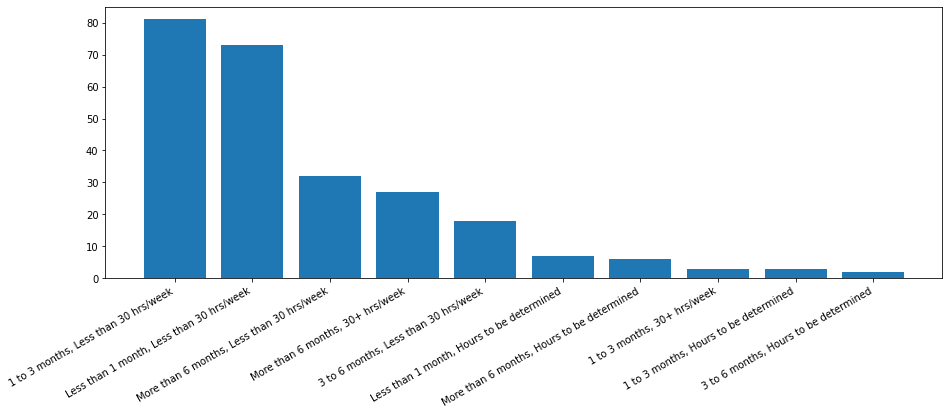

In [17]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

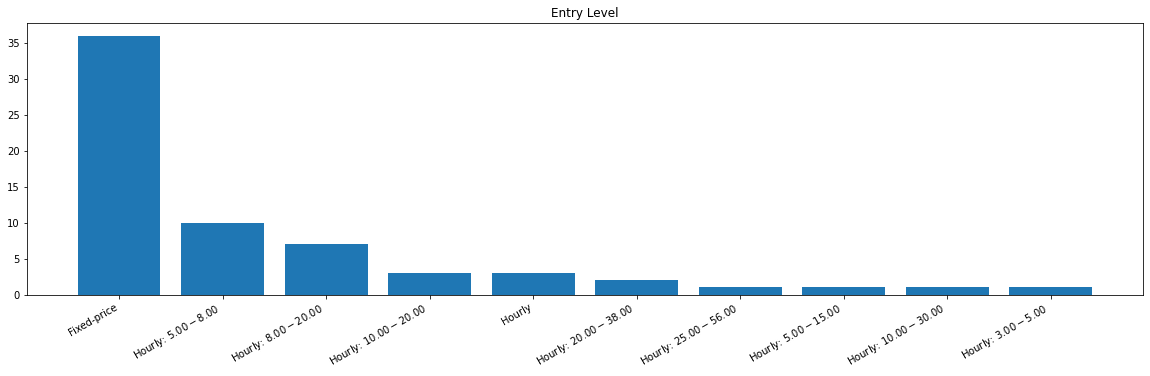

In [18]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


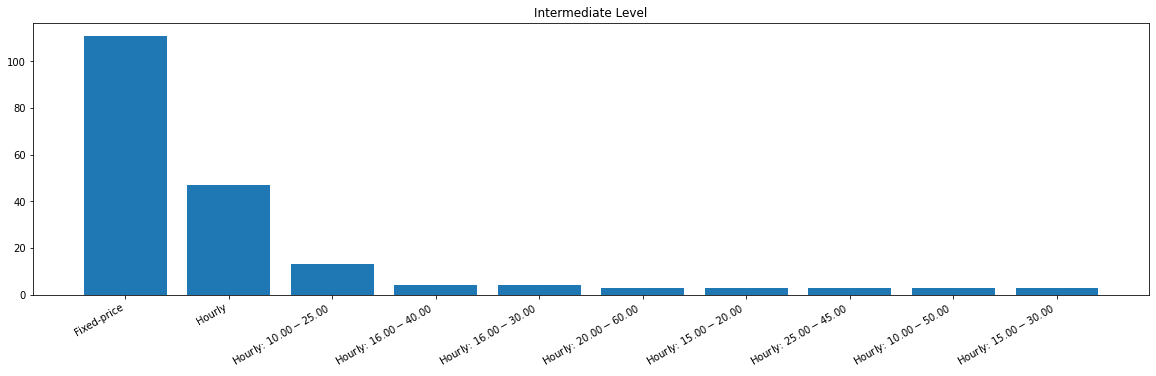

In [19]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

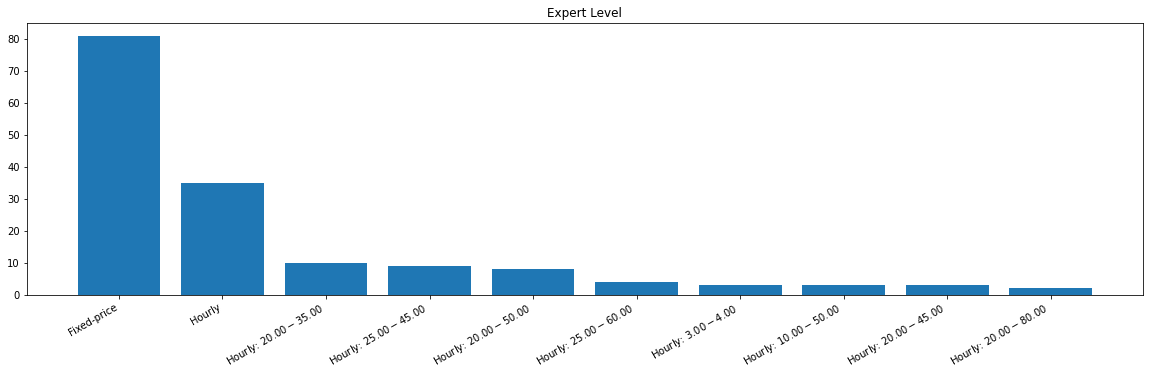

In [20]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

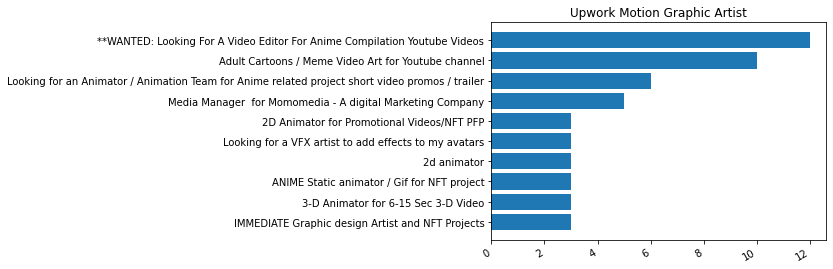

In [21]:
count_job_title = merge["Title"].value_counts()[0:10]
sort = count_job_title.sort_values()
plt.barh(sort.index, sort.values)
plt.title("Upwork Motion Graphic Artist")
plt.xticks(rotation="30",ha="right")
plt.show()